In [10]:
import pandas as pd
import clustering_shrinkage_estimator
import matplotlib.pyplot as plt
import numpy as np

In [4]:
plt.style.use('Solarize_Light2')

In [12]:
def Rtrue(G, Sigma, g):
    return G**2 / (g.T@np.linalg.inv(Sigma)@g).flatten()
def Rin(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def Rout(G, E, Sigma, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@Sigma@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()

In [6]:
data = pd.read_csv('./data/sp_500_returns.csv', index_col='Date')

In [7]:
data.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007950,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.000378,-0.010150,-0.001388,...,-0.017197,-0.006584,-0.010635,0.000233,-0.000283,0.033015,0.006829,-0.013534,-0.007559,0.022063
2012-01-05,0.022382,0.087475,0.006363,0.011102,0.007592,0.008835,-0.002301,-0.019082,0.007072,0.004447,...,-0.010446,0.004418,0.008880,-0.003022,0.000848,-0.014247,0.007631,0.011840,-0.001410,0.028005
2012-01-06,0.010811,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.001733,0.008427,-0.006641,...,-0.035186,-0.002933,-0.006486,-0.007463,-0.005932,-0.016797,0.007237,0.002600,-0.008192,0.001135
2012-01-09,0.026203,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.001736,-0.006616,0.019499,...,-0.002805,0.000735,0.021759,0.004464,-0.004831,0.003973,-0.003843,0.007410,-0.004557,0.013605
2012-01-10,0.018760,0.000000,0.000839,0.003580,0.011408,-0.002746,0.004655,0.017201,0.023484,0.004372,...,0.008346,0.008082,0.001825,0.002573,0.014278,0.012267,0.006206,0.020964,0.009156,0.016219


In [8]:
split_point = 1000

In [11]:
P1 = np.array(data.iloc[:split_point, :])
P2 = np.array(data.iloc[split_point:, :])

In [13]:
valsG = np.linspace(0,5,100)
g = np.ones(460)
E_in = np.corrcoef(P1.T)
E_out = E_out = np.corrcoef(P2.T)
R_in_E = Rin(valsG, E_in, g)
R_out_E = Rout(valsG,E_in, E_out,g)

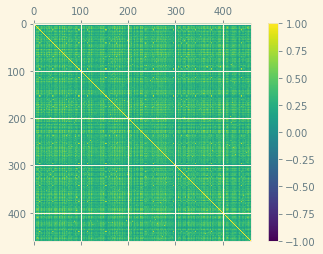

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(E_in, vmin=-1, vmax=1)
fig.colorbar(cax)

In [34]:
%time
E_in_Clust = clustering_shrinkage_estimator.get_shrinkage_est(data.iloc[:split_point, :], 0.5)
E_out_Clust= clustering_shrinkage_estimator.get_shrinkage_est(data.iloc[split_point:, :], 0.5)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11.9 µs


In [28]:
E_in_Clust.shape

(460, 460)

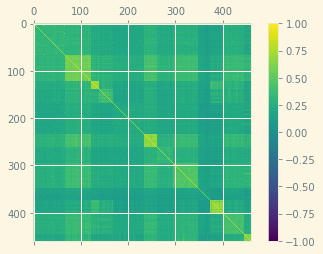

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(E_in_Clust, vmin=-1, vmax=1)
fig.colorbar(cax)

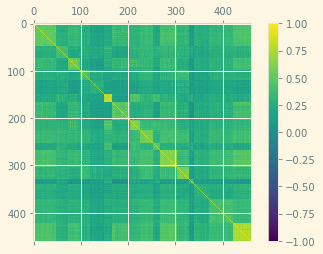

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(E_out_Clust, vmin=-1, vmax=1)
fig.colorbar(cax)

In [38]:
R_in_Clust = Rin(valsG, E_in_Clust, g)
R_out_Clust = Rout(valsG, E_in_Clust, E_out_Clust, g)

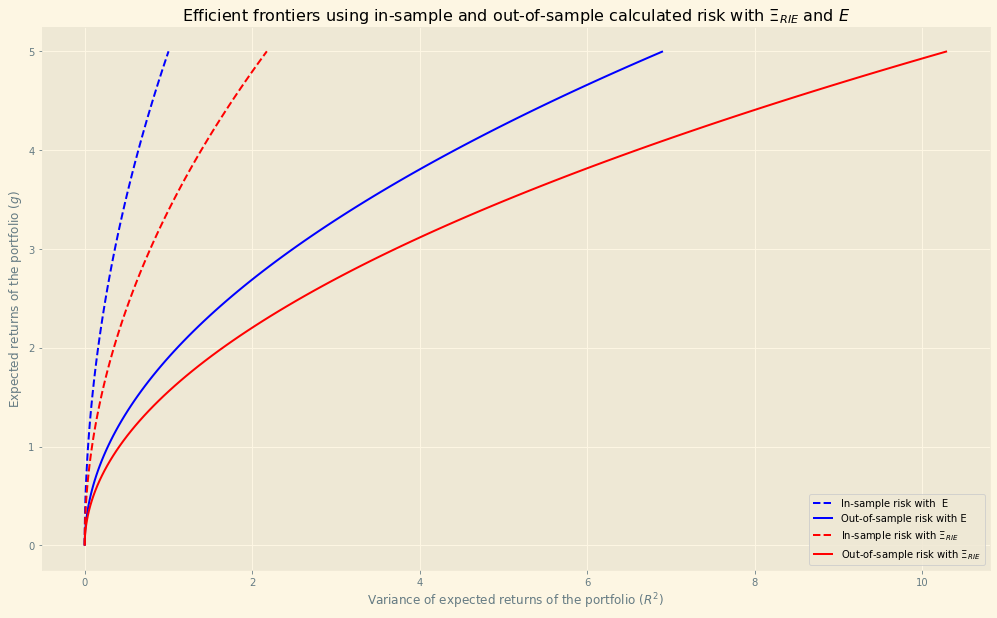

In [39]:
fig = plt.figure(figsize = (17, 10))
ax = plt.axes()
ax.set_xlabel(r'Variance of expected returns of the portfolio ($R^2$)')
ax.set_ylabel('Expected returns of the portfolio ($g$)')

plt.plot(R_in_E,valsG,    c ="b", label = r"In-sample risk with  E", linestyle='--') 
plt.plot(R_out_E,valsG,    c ="b", label = r"Out-of-sample risk with E") 
plt.plot(R_in_Clust,valsG,    c ="r", label = r"In-sample risk with $\Xi_{RIE}$", linestyle='--') 
plt.plot( R_out_Clust,valsG,   c ="r", label = r"Out-of-sample risk with $\Xi_{RIE}$") 

plt.title(r"Efficient frontiers using in-sample and out-of-sample calculated risk with $\Xi_{RIE}$ and $E$")
plt.legend()
plt.savefig('RIEvsE_ing.png')


In [40]:
data_europe = pd.read_csv('./data/european_market_returns.csv', index_col='Date')

In [41]:
data_europe.head()

,AD.AS,AGN.AS,AKZA.AS,ASM.AS,ASML.AS,BESI.AS,DSM.AS,HEIA.AS,INGA.AS,KPN.AS,...,NOVN.SW,PGHN.SW,ROG.SW,SCMN.SW,SGSN.SW,SIKA.SW,SLHN.SW,SREN.SW,UBSG.SW,ZURN.SW
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.013989,-0.022188,-0.010568,-0.026655,-0.020058,0.002885,0.004205,-0.009277,-0.014184,-0.021691,...,0.001838,0.000000,0.004941,-0.003056,-0.009446,-0.007096,-0.002818,0.000407,0.003469,-0.001852
2012-01-05,-0.001468,-0.019175,-0.000923,0.015680,-0.005938,-0.003068,-0.004863,-0.000407,-0.034918,-0.021047,...,-0.001835,-0.030488,0.000615,-0.016160,-0.005722,-0.015943,-0.031091,-0.008138,-0.032844,-0.006957
2012-01-06,0.002450,0.001629,0.004223,0.019352,0.009431,0.000192,-0.005701,-0.008553,-0.008182,0.000230,...,0.005515,0.000000,0.009214,-0.000283,0.008312,-0.003352,-0.004667,-0.014359,-0.008936,-0.001868
2012-01-09,0.002933,-0.008133,0.001972,0.007679,0.009031,-0.009615,-0.008055,0.010270,0.006416,-0.001149,...,-0.011901,-0.009434,-0.004260,-0.004533,0.006975,0.008969,-0.025791,-0.004995,-0.035167,-0.007019
2012-01-10,0.009259,0.073795,0.023610,0.037257,0.002469,0.003883,0.022296,0.001084,0.054098,-0.006329,...,0.001869,0.003175,-0.002445,0.014798,0.020151,0.042778,0.009627,0.031793,0.035514,0.024505


In [115]:
data_europe['LIN.DE']

Date
2012-01-04    0.000000
2012-01-05    0.000000
2012-01-06    0.000000
2012-01-09    0.000000
2012-01-10    0.000000
                ...   
2021-12-06    0.007898
2021-12-07    0.000000
2021-12-08    0.017761
2021-12-09    0.008554
2021-12-10    0.001696
Name: LIN.DE, Length: 2448, dtype: float64

In [117]:
data_europe_fix = data_europe.drop(['LIN.DE'], axis = 1)

In [146]:
split_point = 2100

In [147]:
P1 = np.array(data_europe_fix.iloc[:split_point, :])
P2 = np.array(data_europe_fix.iloc[split_point:, :])

In [148]:
valsG = np.linspace(0,5,100)
g = np.ones(271)
E_in = np.corrcoef(P1.T)
E_out = E_out = np.corrcoef(P2.T)
R_in_E = Rin(valsG, E_in, g)
R_out_E = Rout(valsG,E_in, E_out,g)

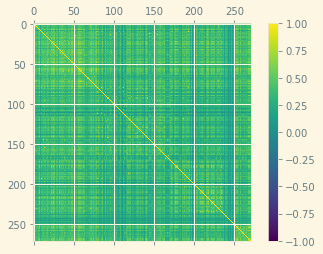

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(E_in, vmin=-1, vmax=1)
fig.colorbar(cax)

In [170]:
%time
E_in_Clust = clustering_shrinkage_estimator.get_shrinkage_est(data_europe_fix.iloc[:split_point, :], 0)
E_out_Clust= clustering_shrinkage_estimator.get_shrinkage_est(data_europe_fix.iloc[split_point:, :], 0)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 16.9 µs


In [ ]:
E_out

In [171]:
R_in_Clust = Rin(valsG, E_in_Clust, g)
R_out_Clust = Rout(valsG, E_in_Clust, E_out_Clust, g)

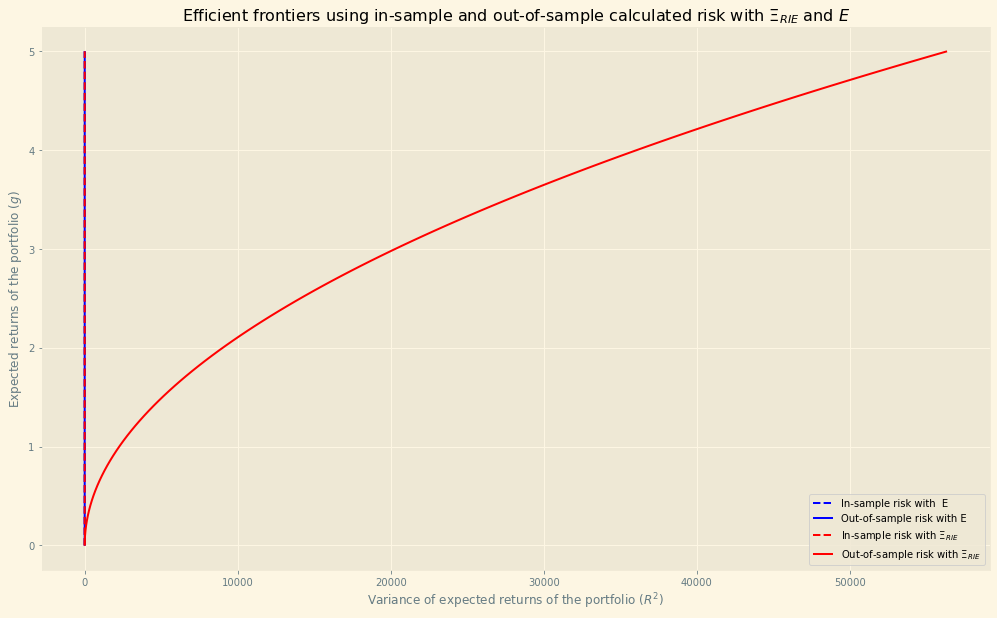

In [172]:
fig = plt.figure(figsize = (17, 10))
ax = plt.axes()
ax.set_xlabel(r'Variance of expected returns of the portfolio ($R^2$)')
ax.set_ylabel('Expected returns of the portfolio ($g$)')

plt.plot(R_in_E,valsG,    c ="b", label = r"In-sample risk with  E", linestyle='--') 
plt.plot(R_out_E,valsG,    c ="b", label = r"Out-of-sample risk with E") 
plt.plot(R_in_Clust,valsG,    c ="r", label = r"In-sample risk with $\Xi_{RIE}$", linestyle='--') 
plt.plot( R_out_Clust,valsG,   c ="r", label = r"Out-of-sample risk with $\Xi_{RIE}$") 

plt.title(r"Efficient frontiers using in-sample and out-of-sample calculated risk with $\Xi_{RIE}$ and $E$")
plt.legend()
plt.savefig('RIEvsE_ing.png')
